In [9]:
import matplotlib.pyplot as plt
import numpy as np
import csv

rank = 20

In [10]:
def sorted_weights(base_id):
    file_name = f"log/ho_wfedavg_log_base{base_id}.csv"
    log_f = open(file_name, "r")
    reader = csv.reader(log_f)
    data = []
    for row in reader:
        data.append(row)
    weights = data[0]
    float_weights = [[] for _ in range(len(weights))]
    for i, wei in enumerate(weights):
        f_wei = wei[1:-1]
        f_wei = f_wei.split(",")
        f_wei = list(map(float, f_wei))
        for w in f_wei:
            float_weights[i].append(w)
    array_data = np.array(float_weights)
    rewards = np.array([list(map(float, data[1]))])
    rewards = rewards.T
    array_data = np.hstack([array_data, rewards])
    array_data = array_data[np.argsort(array_data[:,-1])]
    array_data = np.flip(array_data, 0)
    return array_data

def get_data_for_plot(base_id):
    plot_data = sorted_weights(base_id)
    plot_data = np.delete(plot_data, -1, 1)
    return plot_data

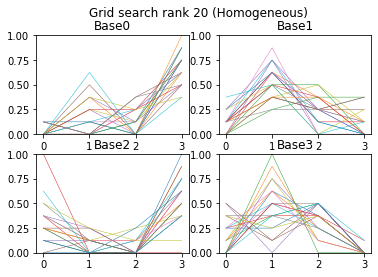

In [11]:
for base in range(4):
    plt.subplot(f"22{base+1}")
    plot_data = get_data_for_plot(base)
    for i in range(rank):
        plt.xticks([0,1,2,3])
        plt.ylim(0, 1)
        plt.plot(plot_data[i], linewidth=0.5)
    plt.title(f"Base{base}")
plt.suptitle(f"Grid search rank {rank} (Homogeneous)")
plt.show()

simple test [256.91461585350754, 245.9132192182173, 247.59067001415832, 238.19693632854728]
after fedavg [-101.88078, 197.15944, 66.23624, 209.20699]
wfed grid search [227.95998, 232.56314, 166.50919, 26.48438]


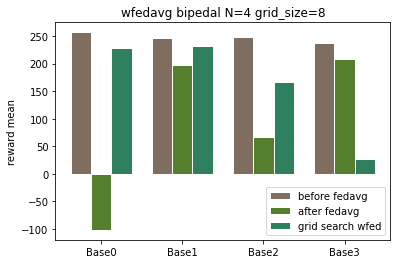

In [12]:
labels = [f"Base{i}" for i in range(4)]
before_fedavg = []
for i in range(4):
    data = np.genfromtxt(f"log/agent{i}_simple_agent_test.csv", delimiter=",")
    data = data[0][i]
    before_fedavg.append(data)
print("simple test", before_fedavg)

after_fedavg = []
for i in range(4):
    file_name = f"log/wfedavg_log_base{i}.csv"
    log_f = open(file_name, "r")
    reader = csv.reader(log_f)
    data = []
    for row in reader:
        data.append(row)
    index = data[0].index("[0.25, 0.25, 0.25, 0.25]")
    after_fedavg.append(float(data[1][index]))
print("after fedavg", after_fedavg)

grid_search_wfed = []
for i in range(4):
    data = sorted_weights(i)
    grid_search_wfed.append(data[0, -1])
print("wfed grid search", grid_search_wfed)

barwidth = 0.25
r1 = np.arange(len(before_fedavg))
r2 = [x + barwidth for x in r1]
r3 = [x + barwidth for x in r2]

# Make the plot
plt.bar(r1, before_fedavg, color='#7f6d5f', width=barwidth, edgecolor='white', label='before fedavg')
plt.bar(r2, after_fedavg, color='#557f2d', width=barwidth, edgecolor='white', label='after fedavg')
plt.bar(r3, grid_search_wfed, color='#2d7f5e', width=barwidth, edgecolor='white', label='grid search wfed')
 
# Add xticks on the middle of the group bars
# plt.xlabel('group', fontweight='bold')
plt.xticks([r + barwidth for r in range(len(before_fedavg))], labels)
 
# Create legend & Show graphic
plt.title("wfedavg bipedal N=4 grid_size=8")
plt.legend()
plt.ylabel("reward mean")
plt.show()


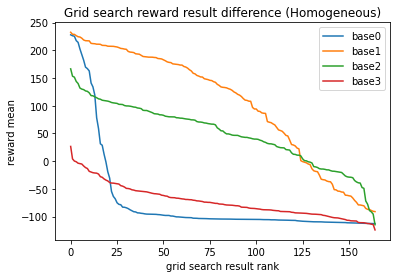

In [13]:
plt.title("Grid search reward result difference (Homogeneous)")
for i in range(4):
    data = sorted_weights(i)
    plt.plot(data.T[-1], label=f"base{i}")
plt.legend()
plt.xlabel("grid search result rank")
plt.ylabel("reward mean")
plt.show()

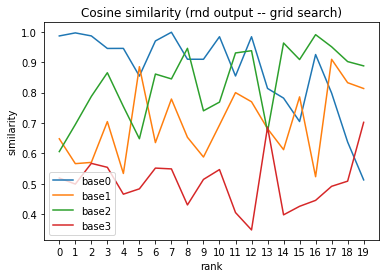

In [15]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.special import softmax

plt.title("Cosine similarity (rnd output -- grid search)")

standardized_int_rwd = np.genfromtxt("log/ho_rnd_log.csv", delimiter=",")
standardized_int_rwd = standardized_int_rwd[:,1:]

k = -0.5
reverse_norm_std_int_rwd = softmax(k*np.array(standardized_int_rwd), axis=1)

similarity = [[] for _ in range(4)]
for i, line in enumerate(reverse_norm_std_int_rwd):
    data = get_data_for_plot(i)
    for rank in range(20):
        sim = cosine_similarity([line], [data[rank]])
        similarity[i].append(sim[0,0])
    plt.plot(similarity[i], label=f"base{i}")

plt.xticks(range(20))
plt.xlabel("rank")
plt.ylabel("similarity")
plt.legend()
plt.show()
